In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import theano
import theano.gpuarray
import pygpu
from pygpu import gpuarray
theano.gpuarray.use("cuda"+str(0))
from six.moves import cPickle
import os
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statistics as stats
import glob
from texttable import Texttable
from nolearn.lasagne import visualize

f=open('e_obj.save','rb')
net=cPickle.load(f)
f.close()



WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_bj403qrm.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda0: Tesla P100-PCIE-12GB (0000:81:00.0)
/data/mbg/anaconda3/lib/python3.6/site-packages/lasagne/layers/corrmm.py:37: UserWarning: You are using a GPU layer with Theano configured for double precision (floatX=float64). Depending on your Theano version and GPU, this may be slow or unsupported. We recommend to configure Theano for single precision (floatX=float32); see http://lasagne.readthedocs.org/en/latest/user/installation.html#gpu-support.
  warnings.warn("You are using a GPU layer with Theano configured for "
/data/mbg/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in 

In [3]:
x=np.load("/data/mbg/ensemble/code/experiments/cnn_2_22/X_train.npy")
y=np.load("/data/mbg/ensemble/code/experiments/cnn_2_22/y_train.npy")

<module 'matplotlib.pyplot' from '/data/mbg/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

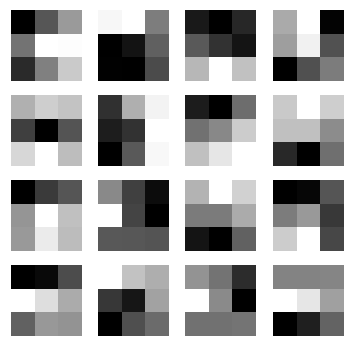

In [4]:
visualize.plot_conv_weights(net.layers_['conv2d1'])

<module 'matplotlib.pyplot' from '/data/mbg/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

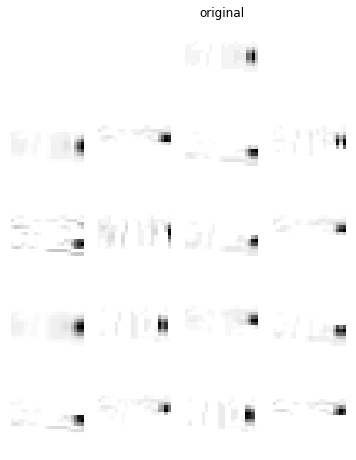

In [5]:
visualize.plot_conv_activity(net.layers_['conv2d1'],x[333].reshape(1,1,22,24))

<module 'matplotlib.pyplot' from '/data/mbg/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

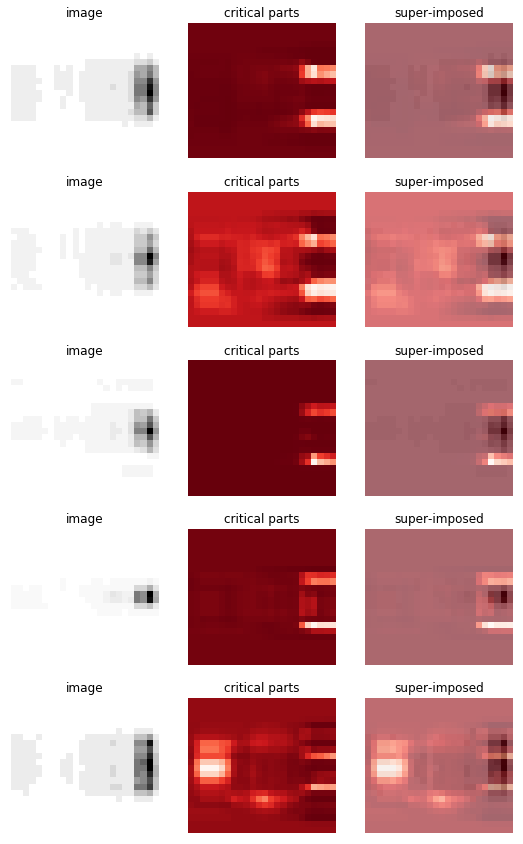

In [19]:
visualize.plot_occlusion(net, x[:5], y[:5])

In [21]:
visualize.occlusion_heatmap(net, x[0].reshape(1,1,22,24), y[0])

array([[1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02],
       [1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02],
       [1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.41680371e-02,
        1.41680371e-02, 1.41680371e-02, 1.41680371e-02, 1.4168

<module 'matplotlib.pyplot' from '/data/mbg/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

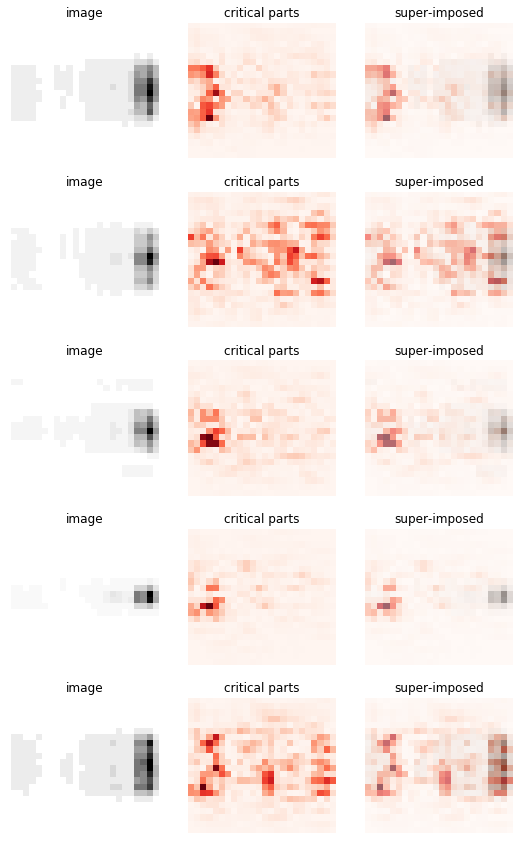

In [22]:
visualize.plot_saliency(net,x[:5])

In [3]:
visualize.draw_to_file(net,"neet.png")

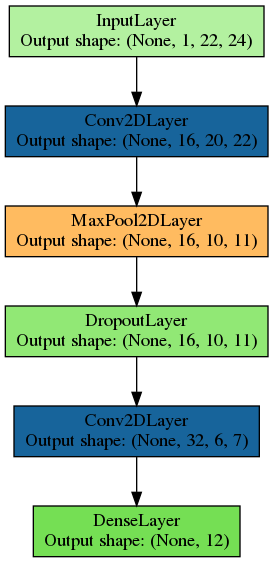

In [4]:
visualize.draw_to_notebook(net)

In [14]:
visualize.make_pydot_graph(lasagne.layers.get_all_layers(net))

AttributeError: 'NeuralNet' object has no attribute 'output_shape'

In [11]:
w=net.layers_['conv2d1'].W.get_value()

In [12]:
w.shape

(16, 1, 3, 3)

In [7]:
w

array([[[[-1.67225224e-03, -1.10475938e-02,  2.87082590e-02,
           1.39699117e-01,  4.34122822e-02],
         [ 4.02324371e-03,  2.13264678e-02, -2.44651579e-02,
          -7.67305219e-03,  8.62835507e-02],
         [ 8.80922145e-03,  2.03061617e-02,  9.07243866e-03,
          -6.47032459e-02,  7.06628429e-03],
         [-7.93481642e-03, -1.32806030e-02, -3.72495319e-02,
          -5.74417501e-02,  4.58105584e-02],
         [ 2.47398285e-02,  1.57305873e-02, -5.45781596e-03,
           7.87141666e-02,  1.50622246e-01]],

        [[-1.81524320e-02, -3.95076862e-03,  1.27478349e-03,
           2.88333830e-03, -1.50772597e-02],
         [-1.58886590e-02, -1.83355010e-02, -5.74353316e-03,
           1.20107944e-02,  2.00619233e-02],
         [-2.30890630e-02, -1.71972804e-02, -2.41236858e-02,
           1.85061554e-02,  2.67798027e-02],
         [ 1.54502610e-02,  8.23043015e-03,  1.55927289e-03,
          -4.88159689e-02, -6.29325909e-02],
         [-6.11248915e-02, -3.61620979e-02, 

In [16]:
from itertools import product
from lasagne.layers import get_output
from lasagne.layers import get_output_shape
from lasagne.objectives import binary_crossentropy
import matplotlib.pyplot as plt
import numpy as np
import theano
import theano.tensor as T
import io
import lasagne

layer=net.layers_['conv2d1']

xs = T.tensor4('xs').astype(theano.config.floatX)
get_activity = theano.function([xs], get_output(layer, xs))

activity2 = get_activity(x[35].reshape(1,1,22,24))

In [18]:
activity2.shape

(1, 16, 20, 22)

In [24]:
activity=activity2.reshape((20,22,1,16))

In [25]:
activity.shape

(20, 22, 1, 16)

In [28]:
activity2[:,:,0,0]

array([[1.21259202e-04, 6.98676089e-04, 0.00000000e+00, 0.00000000e+00,
        6.45802745e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.33866818e-04, 0.00000000e+00, 0.00000000e+00]])

In [29]:
activity2

array([[[[0.00012126, 0.00012126, 0.00012126, ..., 0.00012126,
          0.00012126, 0.00012126],
         [0.00012126, 0.00012126, 0.00012126, ..., 0.00012126,
          0.00012126, 0.00012126],
         [0.00012126, 0.00012126, 0.00012126, ..., 0.00012126,
          0.00012126, 0.00012126],
         ...,
         [0.00012126, 0.00012126, 0.00012126, ..., 0.00012126,
          0.00012126, 0.00012126],
         [0.00012126, 0.00012126, 0.00012126, ..., 0.00012126,
          0.00012126, 0.00012126],
         [0.00012126, 0.00012126, 0.00012126, ..., 0.00012126,
          0.00012126, 0.00012126]],

        [[0.00069868, 0.00069868, 0.00069868, ..., 0.00069868,
          0.00069868, 0.00069868],
         [0.00069868, 0.00069868, 0.00069868, ..., 0.00069868,
          0.00069868, 0.00069868],
         [0.00069868, 0.00069868, 0.00069868, ..., 0.00069868,
          0.00069868, 0.00069868],
         ...,
         [0.00069868, 0.00069868, 0.00069868, ..., 0.00069868,
          0.00069868, 0.0